# Pore Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Import data

In [7]:
unidentified_pore_data = pd.read_csv('data/microscopy-data.csv')
dunk_data = pd.read_csv('data/dunking-data.csv')
unidentified_pore_data

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07
...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07


In [8]:
# merge dataframes to identify biscuits in pore data

pore_data = pd.merge(unidentified_pore_data, dunk_data, on = ['gamma', 'phi', 'eta', 'L', 't'], how = 'left')
pore_data

,gamma,phi,eta,L,t,r,biscuit
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,Digestive
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,Rich Tea
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,Hobnob
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,Digestive
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,Digestive
...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,Hobnob
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,Digestive
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,Digestive
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,Digestive


In [15]:
# See how many of each biscuit is in dataframe

value_counts = pore_data['biscuit'].value_counts()
value_counts

biscuit
Rich Tea     169
Digestive    168
Hobnob       163
Name: count, dtype: int64

## Bin data

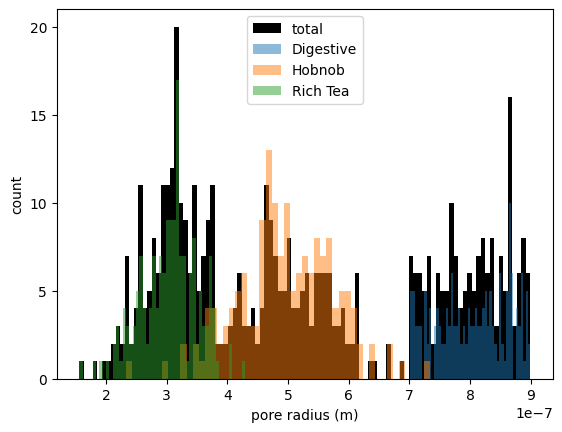

In [37]:
fig, ax = plt.subplots()

ax.hist(pore_data['r'], bins = 100, label = 'total', color = 'black')
ax.hist(pore_data[pore_data['biscuit'] == 'Digestive']['r'], bins = 50, label = 'Digestive', alpha = 0.5)
ax.hist(pore_data[pore_data['biscuit'] == 'Hobnob']['r'], bins = 50, label = 'Hobnob', alpha = 0.5)
ax.hist(pore_data[pore_data['biscuit'] == 'Rich Tea']['r'], bins = 50, label = 'Rich Tea', alpha = 0.5)

ax.set_xlabel('pore radius (m)')
ax.set_ylabel('count')
ax.set_yticks(np.linspace(0,20,5))
plt.legend()

plt.show()